In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['ggplot'])
sns.set_palette("deep", 10)
plt.figure(figsize=(12,6))


df = pd.read_csv("googleplaystore.csv", sep=",")

df = df.drop(df.index[10472])
df.drop_duplicates(subset=['App'])

df['Android Ver'].replace('', np.nan, inplace=True)
#df.dropna()

df['Size'] = df['Size'].replace({'k': '*1e3', 'M': '*1e6', 'Varies with device':'-1'}, regex=True).map(pd.eval).astype(int)

df = df.assign(
    Installs = pd.to_numeric(df['Installs'].str.replace('[^0-9.]', '', regex=True)),
    Price = pd.to_numeric(df['Price'].str.replace('[^0-9.]', '', regex=True))
)

df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


<Figure size 1200x600 with 0 Axes>

In [103]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                       int64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

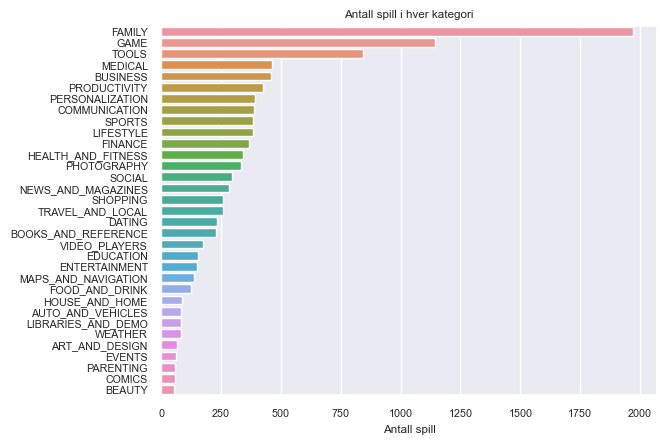

In [104]:
antall_Cat = df['Category'].value_counts()
#print(antall_Cat)
sns.set(font_scale=0.7)
plt.title('Antall spill i hver kategori')
sns.barplot(x=antall_Cat, y=antall_Cat.index)
plt.xlabel('Antall spill')
plt.show()

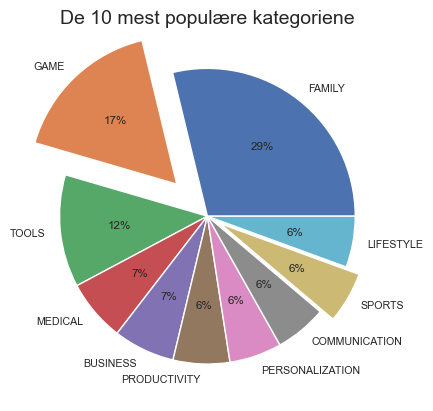

In [116]:
plt.title('De 10 mest populære kategoriene', size=14)
plt.pie(antall_Cat[:10], labels=antall_Cat[:10].index, explode = [0,0.3,0,0,0,0,0,0,0.1,0], autopct='%.0f%%')
plt.show()